# Example scans of a toy function

In [1]:
import numpy as np
from hyvis.basic_scans import AffineSubspace , landscape_scan_linear

The module scans_linear can be used to scan a landscape defined by some function along a chosen 2D slice.

The example here is a simple product of cosines.

In [2]:
def testfunc(
    arg: np.ndarray
) -> float:
    return np.prod(np.cos(arg))

Now you can define some slices/affine linear subspaces you want to scan.
To do so, provide an orthonormal set of vectors in 'directions' and a center/origin for the subspace in 'origin'. 

In [3]:
subspace1 = AffineSubspace(
    directions= np.array([[1,0,0,0],np.array([0,1,0,0])]),
    center= np.pi * np.ones([1,4]))

subspace2 = AffineSubspace(
    directions= np.array([[1,0,0,0],np.array([0,(1/np.sqrt(2)),(1/np.sqrt(2)),0])]),
    center= np.pi * np.ones([1,4]))
    
subspace3 = AffineSubspace(
    directions= np.array([[1,0,0,0],np.array([0,(1/np.sqrt(3)),(1/np.sqrt(3)),(1/np.sqrt(3))])]),
    center= np.pi * np.ones([1,4]))

Then scan a portion of those subspaces (here 2*pi in each direction) with a specified resolution (here 100 samples in each direction, so 10.000 in total! This could take very long for more involved test functions.)

In [4]:
scan1 = landscape_scan_linear(
    func=testfunc,
    subspace=subspace1,
    scope = 2 * np.pi,
    resolution= 100)

scan2 = landscape_scan_linear(
    func=testfunc,
    subspace=subspace2,
    scope = 2 * np.pi,
    resolution= 100)

scan3 = landscape_scan_linear(
    func=testfunc,
    subspace=subspace3,
    scope = 2 * np.pi,
    resolution= 100)

Finally, the scan results can be plotted like so. Note that since we never changed the first direction all plots look the same along the y-axis, however the different options for the second direction yield some interesting patterns.

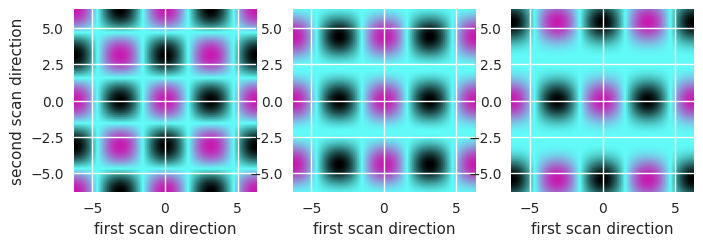

In [5]:
from matplotlib import pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.sca(ax1), scan1.show()
plt.sca(ax2), scan2.show(), plt.ylabel(None)
plt.sca(ax3), scan3.show(), plt.ylabel(None)
plt.show()

A single instance of 'defining the subspace', 'performing the scan' and 'showing the result' can look as follows. You can now play around with this, for example if we change both directions and the scope in the following way, we optain yet another pattern. 

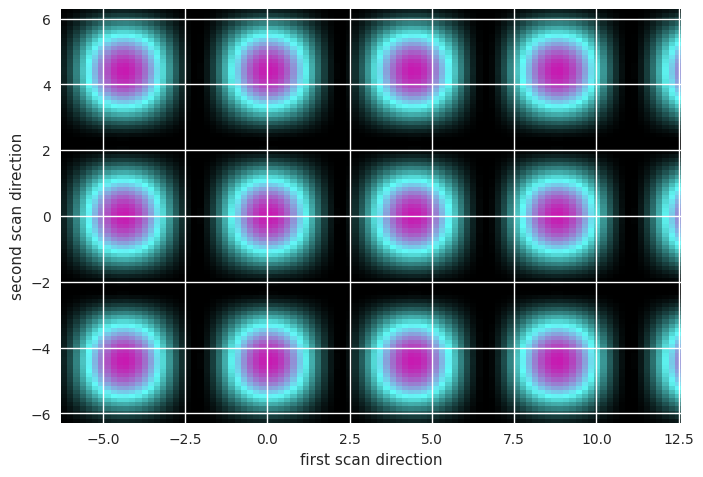

In [6]:
subspace4 = AffineSubspace(
    directions= np.array([
        np.array([(1/np.sqrt(2)),(1/np.sqrt(2)),0,0]),
        np.array([0,0,(1/np.sqrt(2)),(1/np.sqrt(2))])]),
    center= np.pi * np.ones([1,4]))

scan4 = landscape_scan_linear(
    func=testfunc,
    subspace=subspace4,
    scope = 2 * np.pi * np.array([[-1,2],[-1,1]]),
    resolution= 100)

scan4.show()

Please note that the range of the colormap depends on the range of values in the data, so here it's not the same as for the above plots, but you can specify this as keyword arguments for plt.imshow like so:
(here the range of -1 to 1 makes sense because those are the only values this toy function can take at all)

And if you want the values to be displayed as a colorbar you can add the following lines, of which the first 4 are just to make the colorbar have the adequate size, unfortunately colorbars are a bit tricky in matplotlib.

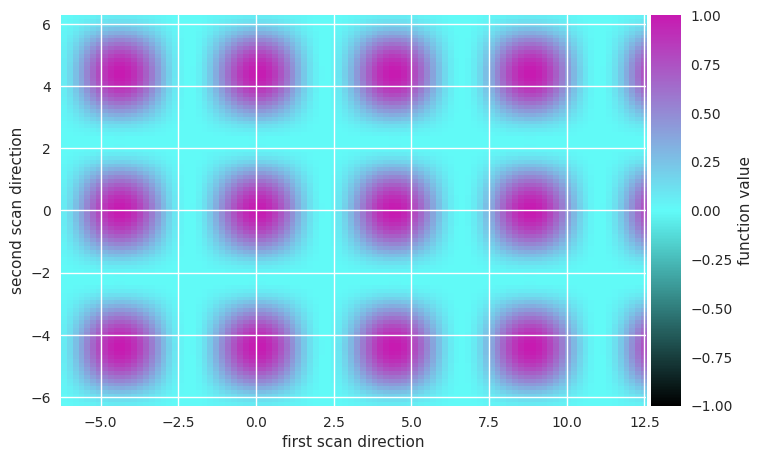

In [7]:
scan4.show(vmin=-1,vmax=1)

from mpl_toolkits.axes_grid1 import make_axes_locatable
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cax=cax,label='function value')


Also, 1D scans work exaclty the same as 2D scans. Just the plot in the end looks different.

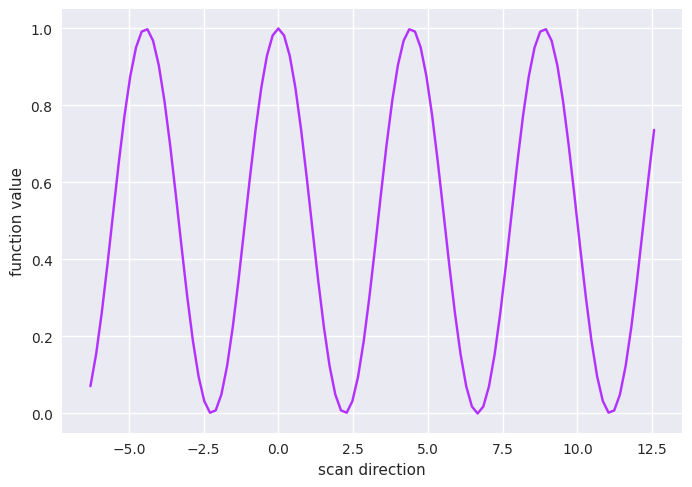

In [8]:
subspace5 = AffineSubspace(
    directions= np.array([
        np.array([(1/np.sqrt(2)),(1/np.sqrt(2)),0,0])]),
    center= np.pi * np.ones([1,4]))

scan5 = landscape_scan_linear(
    func=testfunc,
    subspace=subspace5,
    scope = 2 * np.pi * np.array([[-1,2]]),
    resolution= 100)

scan5.show()

You can now exchange testfunc for any other function that maps some parameter vector to a real number and define a subspace you want to scan. Just pick some point in the space (maybe a known minimum) and define some orthonormal basis of one or two vectors for the scan (maybe the directions of maximal curvature obtained through the hessian). Or just try something random and go from there.


Keep in mind that your function is likely not as simple as the toy example here so you might want to try lower resolutions first:

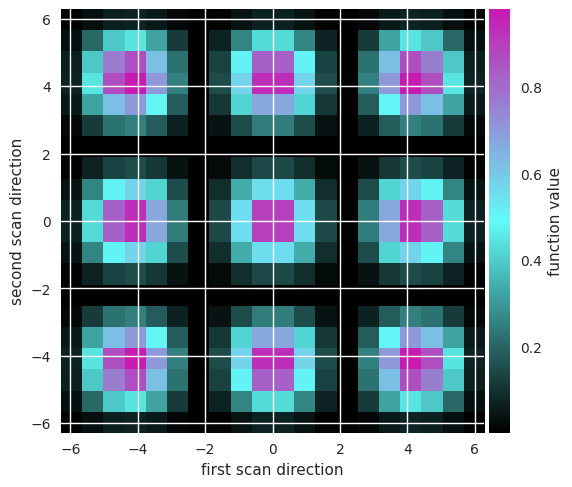

In [9]:
subspace6 = AffineSubspace(
    directions= np.array([
        np.array([(1/np.sqrt(2)),(1/np.sqrt(2)),0,0]),
        np.array([0,0,(1/np.sqrt(2)),(1/np.sqrt(2))])]),
    center= np.pi * np.ones([1,4]))

scan6 = landscape_scan_linear(
    func=testfunc,
    subspace=subspace4,
    scope = 2 * np.pi * np.array([[-1,1],[-1,1]]),
    resolution= 20)

scan6.show()

from mpl_toolkits.axes_grid1 import make_axes_locatable
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
   
plt.colorbar(cax=cax,label='function value')
